In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [68]:
import pandas as pd
dataframe=pd.read_excel("C:/Users/abdulsamet.onay/Desktop/eğitim/bilgeadam python/nihaiveri.xlsx")
dataframe.head(6)

,index,unique,id,salary ($),birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,...,draft_team,draft_year,height,Unnamed: 22,height (cm),highSchool,name,position,shoots,weight (lb)
0,0,abdelal011990,abdelal01,395000,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,...,Portland Trail Blazers,1990,6,10,208.28,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240
1,3,abdulma021990,abdulma02,1660000,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,...,Denver Nuggets,1990,6,1,185.42,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162
2,4,abdulta011997,abdulta01,1226880,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,...,Sacramento Kings,1997,6,6,198.12,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223
3,5,abdursh011996,abdursh01,2186000,"December 11, 1976","Marietta, Georgia",2.5,47.2,29.7,81.0,...,Vancouver Grizzlies,1996,6,9,205.74,"Wheeler in Marietta, Georgia",Shareef Abdur-Rahim,Center and Small Forward and Power Forward,Right,225
4,10,ackeral012005,ackeral01,398762,"January 21, 1983","Compton, California",0.5,37.0,32.0,50.0,...,Detroit Pistons,2005,6,5,195.58,"Eisenhower in Rialto, California",Alex Acker,Shooting Guard,Right,185
5,14,acyqu012012,acyqu01,665000,"October 6, 1990","Tyler, Texas",0.6,44.4,35.0,75.9,...,Toronto Raptors,2012,6,7,200.66,"Mesquite Horn in Mesquite, Texas",Quincy Acy,Power Forward and Small Forward,Right,240


In [69]:
df = dataframe.copy()
df.head()


,index,unique,id,salary ($),birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,...,draft_team,draft_year,height,Unnamed: 22,height (cm),highSchool,name,position,shoots,weight (lb)
0,0,abdelal011990,abdelal01,395000,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,...,Portland Trail Blazers,1990,6,10,208.28,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240
1,3,abdulma021990,abdulma02,1660000,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,...,Denver Nuggets,1990,6,1,185.42,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162
2,4,abdulta011997,abdulta01,1226880,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,...,Sacramento Kings,1997,6,6,198.12,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223
3,5,abdursh011996,abdursh01,2186000,"December 11, 1976","Marietta, Georgia",2.5,47.2,29.7,81.0,...,Vancouver Grizzlies,1996,6,9,205.74,"Wheeler in Marietta, Georgia",Shareef Abdur-Rahim,Center and Small Forward and Power Forward,Right,225
4,10,ackeral012005,ackeral01,398762,"January 21, 1983","Compton, California",0.5,37.0,32.0,50.0,...,Detroit Pistons,2005,6,5,195.58,"Eisenhower in Rialto, California",Alex Acker,Shooting Guard,Right,185


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1309 non-null   int64  
 1   unique       1309 non-null   object 
 2   id           1309 non-null   object 
 3   salary ($)   1309 non-null   int64  
 4   birthDate    1309 non-null   object 
 5   birthPlace   1309 non-null   object 
 6   career_AST   1309 non-null   float64
 7   career_FG%   1309 non-null   float64
 8   career_FG3%  1309 non-null   float64
 9   career_FT%   1309 non-null   float64
 10  career_G     1309 non-null   int64  
 11  career_PER   1309 non-null   float64
 12  career_PTS   1309 non-null   float64
 13  career_TRB   1309 non-null   float64
 14  career_WS    1309 non-null   float64
 15  career_eFG%  1309 non-null   float64
 16  college      1181 non-null   object 
 17  draft_pick   1309 non-null   int64  
 18  draft_round  1309 non-null   int64  
 19  draft_

In [71]:
columns = ['index','unique', 'id','birthDate', 'birthPlace','career_eFG%','college','draft_team','height', 'Unnamed: 22','highSchool', 'name',
       'position']
df.drop(columns, inplace=True, axis=1)

In [72]:
df.head()

,salary ($),career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,draft_pick,draft_round,draft_year,height (cm),shoots,weight (lb)
0,395000,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,25,1,1990,208.28,Right,240
1,1660000,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,3,1,1990,185.42,Right,162
2,1226880,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,11,1,1997,198.12,Right,223
3,2186000,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,3,1,1996,205.74,Right,225
4,398762,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,0.2,60,2,2005,195.58,Right,185


In [73]:
print(df.columns.tolist())

['salary ($)', 'career_AST', 'career_FG%', 'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS', 'career_TRB', 'career_WS', 'draft_pick', 'draft_round', 'draft_year', 'height (cm)', 'shoots', 'weight (lb)']


In [74]:
df=df.rename(columns={"salary ($)":"salary","career_AST":"career_ast","career_FG%":"career_fg","career_FG3%":"career_fg3","career_FT%	":"career_ft","career_G":"career_g",
                      "career_PER":"career_per","career_PTS":"career_pts","career_TRB":"career_trb","career_WS":"career_ws","draft_pick":"draft_pick","draft_round":"draft_round",
                      "draft_year":"draft_year","height (cm)":"height","weight (lb)":"weight","shoots_Left":"shoots_left","shoots_Left Right":"shoots_left_right","shoots_Right":"shoots_right"})
df.head()


,salary,career_ast,career_fg,career_fg3,career_FT%,career_g,career_per,career_pts,career_trb,career_ws,draft_pick,draft_round,draft_year,height,shoots,weight
0,395000,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,25,1,1990,208.28,Right,240
1,1660000,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,3,1,1990,185.42,Right,162
2,1226880,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,11,1,1997,198.12,Right,223
3,2186000,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,3,1,1996,205.74,Right,225
4,398762,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,0.2,60,2,2005,195.58,Right,185


In [75]:
df=df.dropna()

In [76]:
df=pd.get_dummies(df)
df

,salary,career_ast,career_fg,career_fg3,career_FT%,career_g,career_per,career_pts,career_trb,career_ws,draft_pick,draft_round,draft_year,height,weight,shoots_Left,shoots_Left Right,shoots_Right
0,395000,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,25,1,1990,208.28,240,0,0,1
1,1660000,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,3,1,1990,185.42,162,0,0,1
2,1226880,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,11,1,1997,198.12,223,0,0,1
3,2186000,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,3,1,1996,205.74,225,0,0,1
4,398762,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,0.2,60,2,2005,195.58,185,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1563120,0.9,50.9,28.6,76.4,412,14.9,7.0,4.4,17.1,17,1,2012,213.36,253,0,0,1
1305,603000,0.2,40.8,25.0,78.3,135,8.7,3.4,2.1,0.8,22,1,1995,213.36,250,0,0,1
1306,950000,0.2,32.3,0.0,60.0,19,7.3,1.2,1.8,0.0,41,2,2016,213.36,240,1,0,0
1307,750000,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,48,2,2016,203.20,215,0,0,1


In [77]:
#sns.pairplot(df)

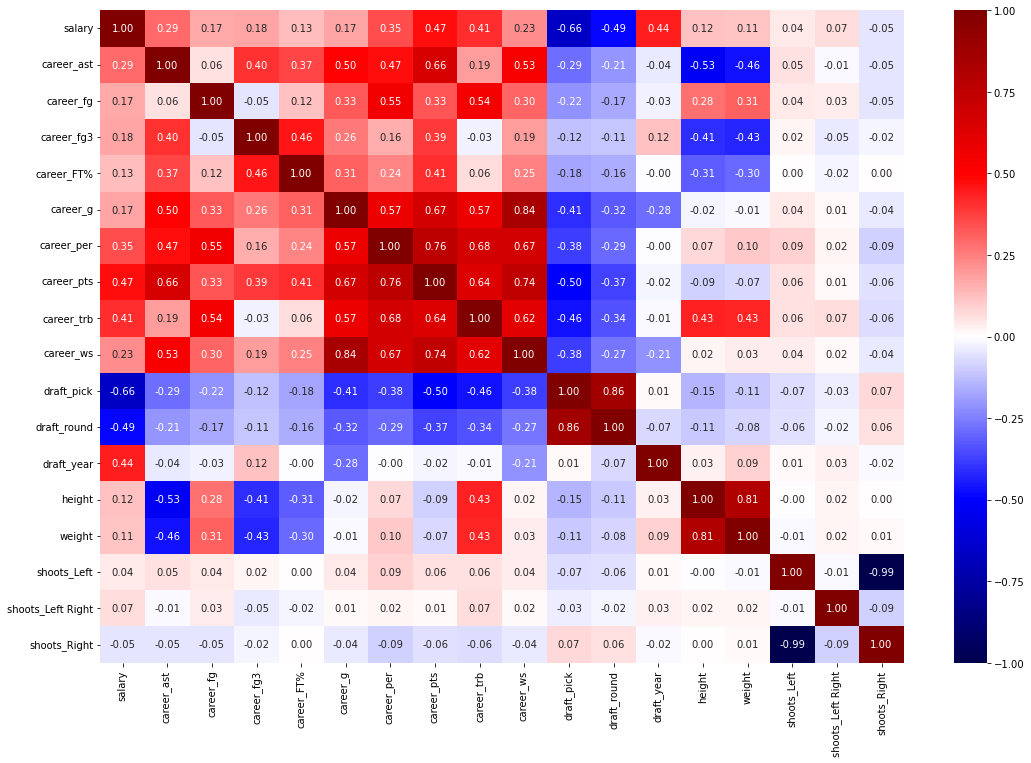

In [78]:
plt.figure(figsize=[18,12])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.2f');

In [79]:
df=df[["salary","career_pts","career_trb","draft_pick","career_per", "draft_year"]]

In [80]:
df.head()

,salary,career_pts,career_trb,draft_pick,career_per,draft_year
0,395000,5.7,3.3,25,13.0,1990
1,1660000,14.6,1.9,3,15.4,1990
2,1226880,7.8,3.3,11,11.4,1997
3,2186000,18.1,7.5,3,19.0,1996
4,398762,2.7,1.0,60,8.5,2005


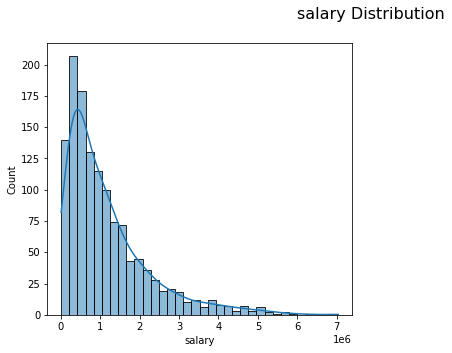

In [81]:
plt.figure(figsize=[12,5])
plt.suptitle('salary Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = df['salary'], kde=True);

In [82]:
df["salary"] = np.log(df["salary"])

C:\Users\ABDULS~1.ONA\AppData\Local\Temp/ipykernel_25108/1860002155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["salary"] = np.log(df["salary"])


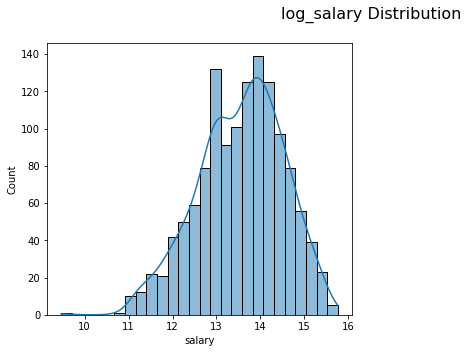

In [83]:
plt.figure(figsize=[12,5])
plt.suptitle('log_salary Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = df['salary'], kde=True);

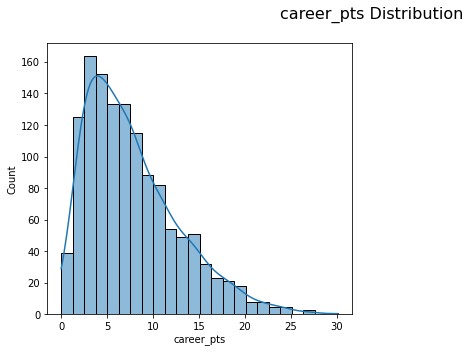

In [84]:

plt.figure(figsize=[12,5])
plt.suptitle('career_pts Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = df['career_pts'], kde=True);


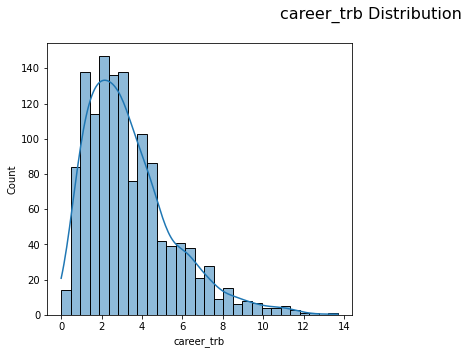

In [85]:
plt.figure(figsize=[12,5])

plt.suptitle('career_trb Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = df['career_trb'], kde=True);

In [86]:
#df["career_trb"] = np.log(df["career_trb"])

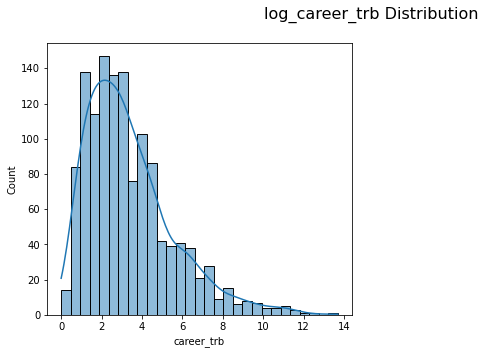

In [87]:
plt.figure(figsize=[12,5])

plt.suptitle('log_career_trb Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = df['career_trb'], kde=True);

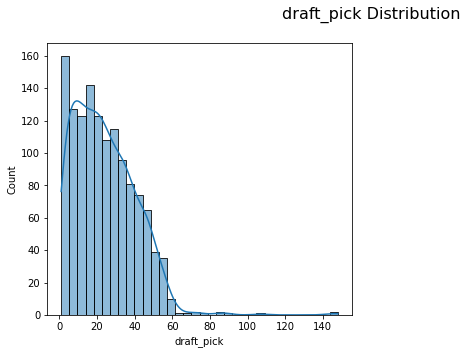

In [88]:
plt.figure(figsize=[12,5])

plt.suptitle('draft_pick Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = df['draft_pick'], kde=True);

In [89]:
#df["draft_pick"] = np.log(df["draft_pick"])

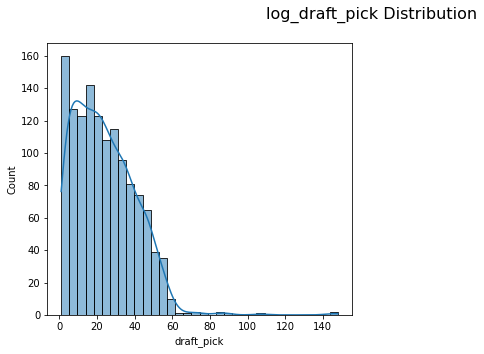

In [90]:
plt.figure(figsize=[12,5])

plt.suptitle('log_draft_pick Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = df['draft_pick'], kde=True);

In [91]:
df["draft_year"] = df["draft_year"].astype(int)
df["draft_year"] = 2022 - df["draft_year"]

C:\Users\ABDULS~1.ONA\AppData\Local\Temp/ipykernel_25108/500695967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["draft_year"] = df["draft_year"].astype(int)
C:\Users\ABDULS~1.ONA\AppData\Local\Temp/ipykernel_25108/500695967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["draft_year"] = 2022 - df["draft_year"]


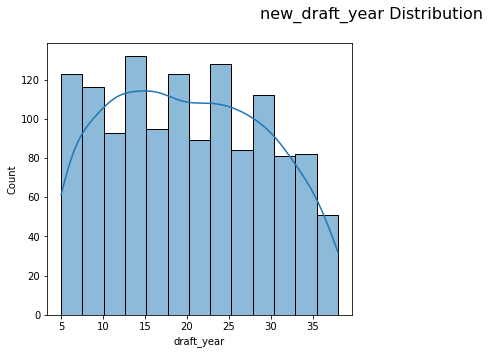

In [92]:
plt.figure(figsize=[12,5])

plt.suptitle('new_draft_year Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = df['draft_year'], kde=True);

In [93]:
df.head()

,salary,career_pts,career_trb,draft_pick,career_per,draft_year
0,12.886641,5.7,3.3,25,13.0,32
1,14.322328,14.6,1.9,3,15.4,32
2,14.019985,7.8,3.3,11,11.4,25
3,14.597584,18.1,7.5,3,19.0,26
4,12.896120,2.7,1.0,60,8.5,17


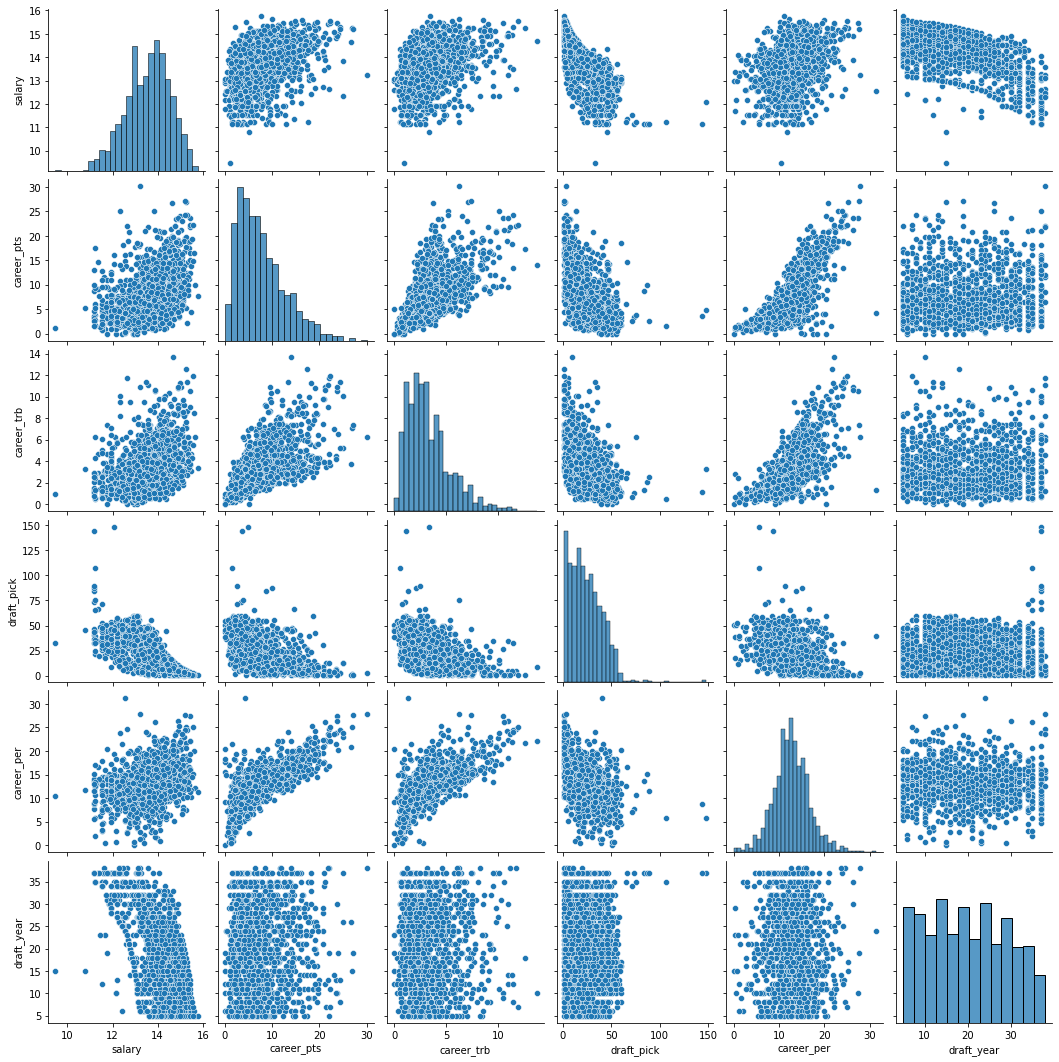

In [94]:
sns.pairplot(df)

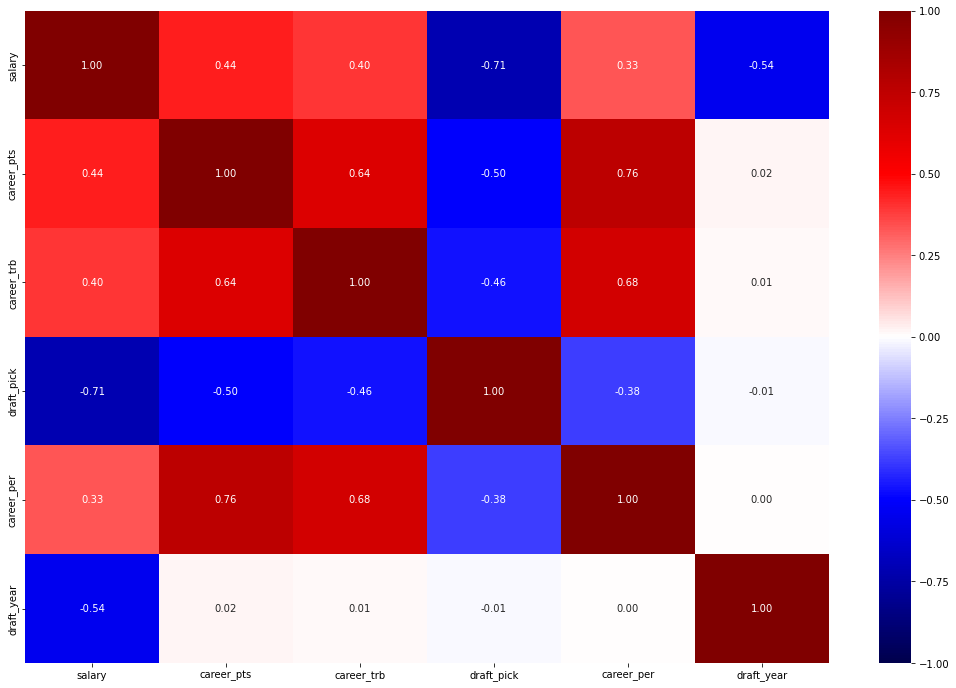

In [95]:
plt.figure(figsize=[18,12])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.2f');

In [96]:
X = df[["career_pts","career_trb","draft_pick","career_per", "draft_year"]]
y= df["salary"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=123)

x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [97]:
print('X Train:', X_train.shape)
print('X Test:', X_test.shape)
print('y Train:', Y_train.shape)
print('y Test:', Y_test.shape)

X Train: (1047, 5)
X Test: (262, 5)
y Train: (1047,)
y Test: (262,)


In [98]:
X_train=sm.add_constant(X_train)

C:\Users\abdulsamet.onay\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [99]:
# Stat Models
lm = sm.OLS(Y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     877.0
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:27:25   Log-Likelihood:                -573.75
No. Observations:                1047   AIC:                             1159.
Df Residuals:                    1041   BIC:                             1189.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3718      0.064    240.060      0.000      15.246      15.497
career_pts     0.0271      0.004      6.328      0.000       0.019       0.036
career_trb     0.0311      0.009      3.535      0.000       0.014       0.048
draft_pick    -0.0363      0.001    -39.118      0.000      -0.038      -0.034
career_per    -0.0099      0.005     -1.814      0.070      -0.021       0.001
draft_year    -0.0563      0.001    -39.444      0.000      -0.059      -0.054
==============================================================================
Omnibus:                      258.959   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13776.471
Skew:                           0.015   Prob(JB):                         0.00
Kurtosis:                      20.771   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
lm = sm.OLS(Y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     877.0
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:05:28   Log-Likelihood:                -573.75
No. Observations:                1047   AIC:                             1159.
Df Residuals:                    1041   BIC:                             1189.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3718      0.064    240.060      0.000      15.246      15.497
career_pts     0.0271      0.004      6.328      0.000       0.019       0.036
career_trb     0.0311      0.009      3.535      0.000       0.014       0.048
draft_pick    -0.0363      0.001    -39.118      0.000      -0.038      -0.034
career_per    -0.0099      0.005     -1.814      0.070      -0.021       0.001
draft_year    -0.0563      0.001    -39.444      0.000      -0.059      -0.054
==============================================================================
Omnibus:                      258.959   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13776.471
Skew:                           0.015   Prob(JB):                         0.00
Kurtosis:                      20.771   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Model ve Katsayıları 

lm = LinearRegression()

model1 = lm.fit(X_train,Y_train)

print(" Sabit Terim :" + str(model1.intercept_))
print(" Katsayılar :" + str(model1.coef_))


 Sabit Terim :15.37177034104716
 Katsayılar :[ 0.          0.02712964  0.03105764 -0.03626278 -0.00986816 -0.05634899]


In [60]:
##  X_train için Model Tahmini

y_pred = model1.predict(X_train)


rmse = np.sqrt(mean_squared_error(Y_train, y_pred))
r2 = model1.score(X_train, Y_train)

# Hata Metrikleri
print("Train Score: " + str(round(r2,3)))
print("RMSE: " + str(round(rmse,3)))

Train Score: 0.808
RMSE: 0.419


In [61]:
#  X_train için cross validation yöntemiyle skor hesaplama
cv_r2_train = cross_val_score(model1, X_train, Y_train, cv = 10, scoring = "r2").mean()
cv_r2_train

0.7994693437010839

In [62]:
##  X_train için cross validation yöntemiyle hata hesaplama

cv_rmse_train = np.sqrt(-cross_val_score(model1, X_train, Y_train, cv = 10, scoring = "neg_mean_squared_error")).mean()
cv_rmse_train

0.4185329291416734

In [66]:
 ## X_test için Model Tahmini

y_pred = model1.predict(X_test)


rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = model1.score(X_train, Y_train)

# Hata Metrikleri
print("Test Score: " + str(round(r2,3)))
print("RMSE: " + str(round(rmse,3)))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 5)

In [37]:
#  X_test için cross validation yöntemiyle skor hesaplama
cv_r2_test = cross_val_score(model1, X_test, Y_test, cv = 10, scoring = "r2").mean()
cv_r2_test

0.8632992093247989

In [38]:
##  X_test için cross validation yöntemiyle hata hesaplama

cv_rmse_test = np.sqrt(-cross_val_score(model1, X_test, Y_test, cv = 10, scoring = "neg_mean_squared_error")).mean()
cv_rmse_test

0.3547785958608838

In [64]:
performance=pd.DataFrame({"Predictions":y_pred,"Actual Salary":Y_test})
performance["error"]=performance["Actual Salary"]-performance["Predictions"]

performance.reset_index(drop=True,inplace=True)
performance.reset_index(inplace=True)
performance.head()


ValueError: array length 1047 does not match index length 262

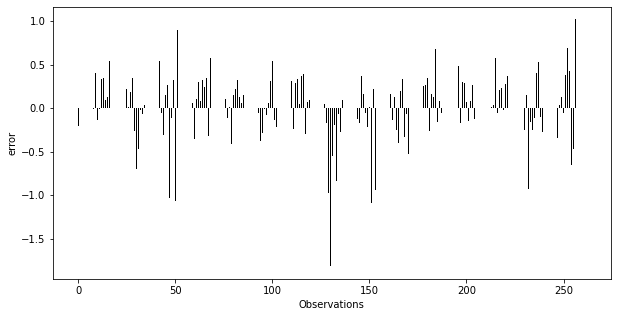

In [40]:
fig=plt.figure(figsize=(10,5))
plt.bar("index","error",data=performance, color="black", width=0.3)
plt.xlabel("Observations")
plt.ylabel("error")
plt.show()